In [1]:
import gensim,os,sys
sys.path.append(os.path.abspath(".."))


import pandas as pd

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from germalemma import GermaLemma
from nltk.util import ngrams

import pyLDAvis.gensim
import seaborn as sns
from collections import  Counter

from modules import utils

text_features = ["kicker","headline","text","seo_title"]

TOP_N = 100

Number of stopwords 607


In [31]:
df= pd.read_csv('../data/bild_articles.csv',index_col=0,parse_dates=["created_at"])
df.dropna(inplace=True)
df[text_features].head(TOP_N)

,kicker,headline,text,seo_title
article_uid,,,,
8c7b60bbbbab27058f93ba3114462b0b9b82f79c3cf3e95e52cf8013742b1f89,Tor nach 3 Sekunden!,Blitz-Comeback von Reus,Wenn du bei deinem Comeback nach 223 Tagen nur...,DFB-Pokal: Duisburg - BVB 0:5! 3 Sekunden nach...
66ef992ac10f512ce621314bcffcbc542549ba1f52c8b11696e33d8730998aba,Sie stoppten das Schalke-Spiel,Türkgücü-Bosse erklärenihre Pokal-Klage,Es war DER Aufreger der 1. DFB-Pokal-Runde. T...,DFB-Pokal: Sie stoppten das Schalke-Spiel – Tü...
bafa8f876a14f50c6010a8ea2ff4de2265e508af13c5007ddb363a4c4b155f4e,Messer-Angriff von Stolberg,Islamist stachschon einmal zu!,Stolberg/Aachen – Der Messerangriff von Stolbe...,Messer-Angriff von Stolberg - Islamist stach...
e353f0b8121a6f0addf3ea3ca5eead419c904d283284fcffcf913ff6f2f39b1c,Hertha verschenkt Machtzentrale,Die neuen Hierarchien der 18 Klubs,Die neue Serie „Die neuen Hierarchien der 18 K...,1. Bundesliga: Die neuen Hierarchien der 18 Kl...
f168dc072b52b38187937175639830ef066209100ffaeea780cb03cd943706d3,Verletzte und neue Offensive,Gisdol schon vorm Start unter Druck!,Das hatte sich Markus Gisdol (50) bei seiner V...,1. FC Köln: Markus Gisdol schon vor Liga-Start...
...,...,...,...,...
590295e18778ddda2fbea0ac849dc1b6037fe9f3a6e08a029b52f3e68e9bbbfa,Prozess wegen gefährlicher Körperverletzung,„Dr. Lips“ soll illegal operiert haben,Mönchengladbach – In den USA war er bekannt al...,Prozess wegen gefährlicher Körperverletzung - ...
d43622ddfa01160e431a96cd165b7039c43ed2c894f972e7923c4ec24be6ee39,Vergeblich gekämpft,Wolfsburgs Camacho: Karriere-Ende mit 30,"Fast zwei Jahre hat er in der Reha geackert, u...",VfL Wolfsburg: Igancio Camacho muss Karriere b...
8fc445a9e2425ac9c1174558405212debf670b1e5d7d76c442e12748d8f8c508,Angebot bei Airbnb,Urlaub in der Villa von „Der Prinz von Bel-Air...,"Fans aufgepasst! 30 Jahre ist es her, dass Wil...",„Der Prinz von Bel-Air“: Will Smith und AirBnb...


Index(['kicker', 'headline', 'text', 'seo_title', 'created_at', 'updated_at',
       'site', 'entities_analyzed'],
      dtype='object')


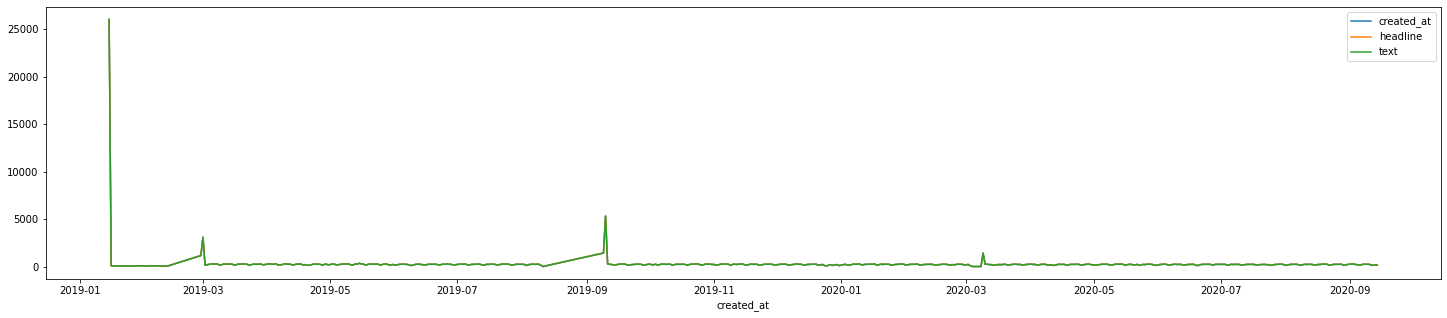

In [40]:
print(df.columns)
df[["created_at", "headline","text"]].groupby((df['created_at'].dt.date)).count().plot(figsize=(25,5))


In [12]:
 
def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('german'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i ] 
    corpus = [word for word in corpus if word not in stop]
    
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:35]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    tmp = pd.DataFrame(top_n_bigrams,columns=["ngram",'zahlen'])
    tmp["n"] = n
    return tmp

x=plot_top_ngrams_barchart(df['headline'],2)
x=plot_top_ngrams_barchart(df['headline'],3)
x=plot_top_ngrams_barchart(df['headline'],4)

#df_list =[]
#for x in range(2,7):
#    df_list.append(plot_top_ngrams_barchart(df['headline'],x))
#
#pd.concat(df_list).to_csv("ngram-freq.csv",index=False)

In [56]:



df= utils.load_text_data()
df.dropna(inplace=True)


In [57]:
corpus=utils.preprocess_and_tokenize_text(df.head(10000))

corpus=gensim.corpora.Dictionary(corpus)
bow_corpus = [gensim.corpora.Dictionary.doc2bow(doc) for doc in corpus]
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 250, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 4)
print(lda_model.show_topics())


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

TypeError: doc2bow() missing 1 required positional argument: 'document'

In [18]:
import os


'/Users/tomasztkaczyk/Desktop/axel/ci-topic-thunder'

In [ ]:
lll

In [5]:
pip install fasttext

  Using cached fasttext-0.9.2.tar.gz (68 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-macosx_10_15_x86_64.whl size=330704 sha256=ba3b611b23bf0bef62799ff222843131e10847569015dc11a46df9ffdb2166ac
  Stored in directory: /Users/tomasztkaczyk/Library/Caches/pip/wheels/93/61/2a/c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext
Note: you may need to restart the kernel to use updated packages.
